In [1]:
from pipeline import CrashClassPipeline
from constants import Algorithm
from custom_losses.utils import decision_curve
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import shap
import gower
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In [2]:
pipeline = CrashClassPipeline()
pipeline.load_data()
pipeline.load_model('final_model.json', Algorithm.CATBOOST)
pipeline.predict()

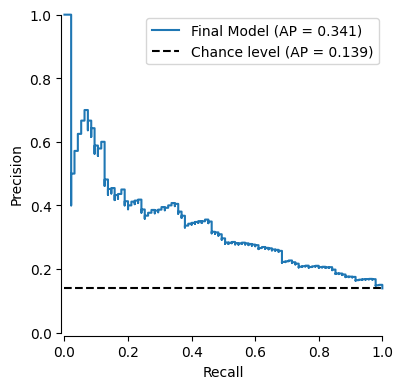

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
PrecisionRecallDisplay.from_estimator(pipeline.model, pipeline.X_test, pipeline.y_test,
                                      ax=ax, plot_chance_level=True, despine=True)
ax.legend(loc='upper right', labels=('Final Model (AP = 0.341)', 'Chance level (AP = 0.139)'))
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.tight_layout()
plt.show()

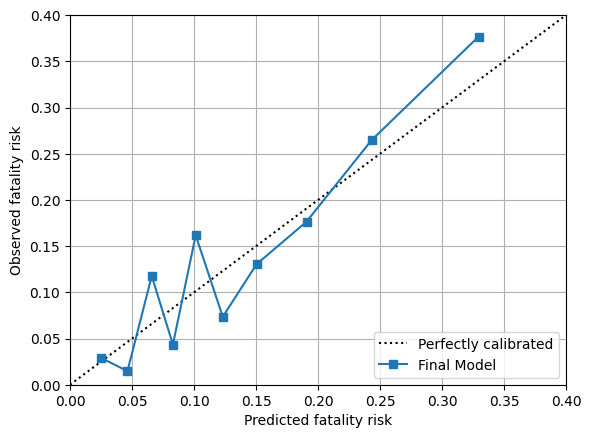

In [4]:
pipeline.calibrate()

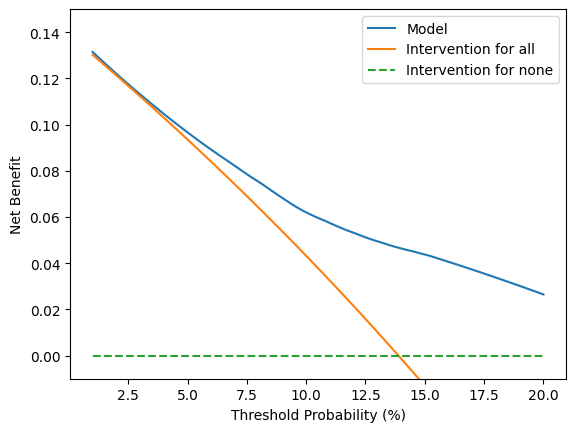

In [5]:
pipeline.dca()

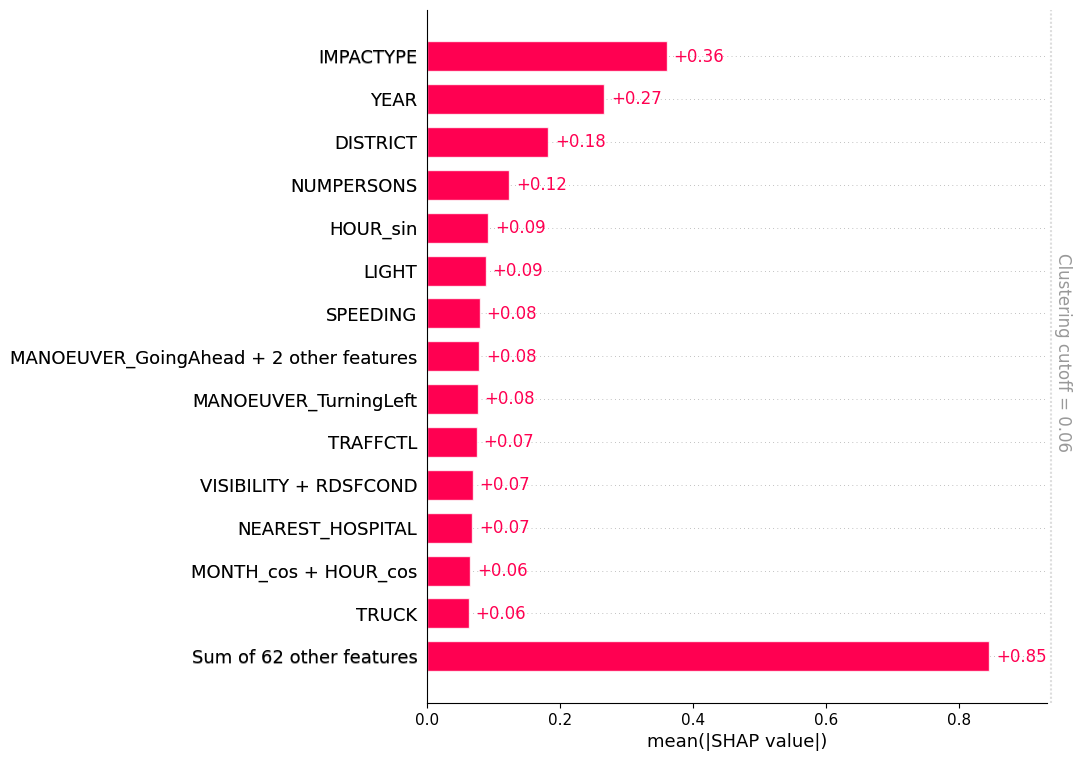

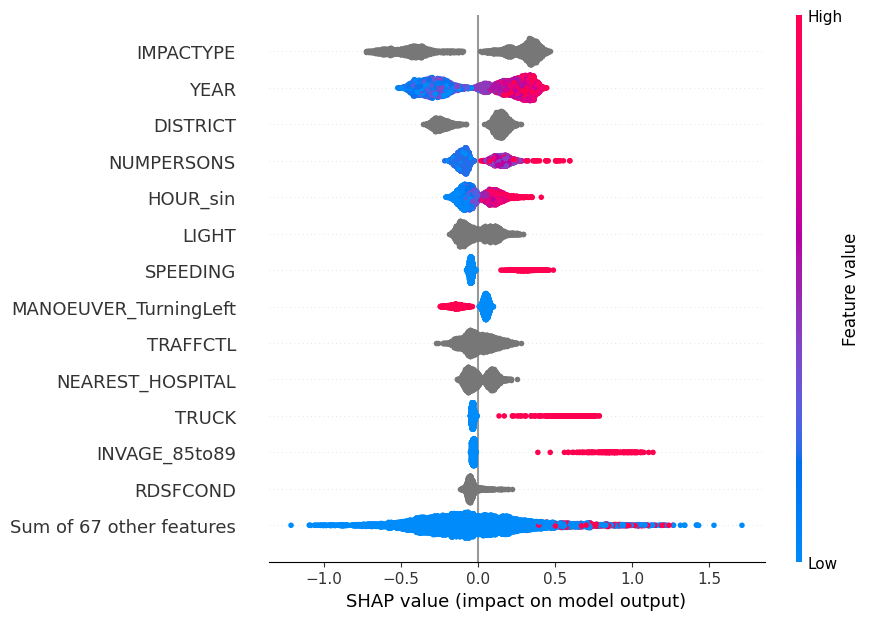

In [6]:
gower_dist = gower.gower_matrix(pipeline.X_train.T)
condensed_gower = squareform(gower_dist)
clust = linkage(condensed_gower, method='average')
explainer = shap.TreeExplainer(pipeline.model)
shap_values = explainer(pipeline.X_train, pipeline.y_train)
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=0.06, max_display=15)
shap.plots.beeswarm(shap_values, max_display=14)

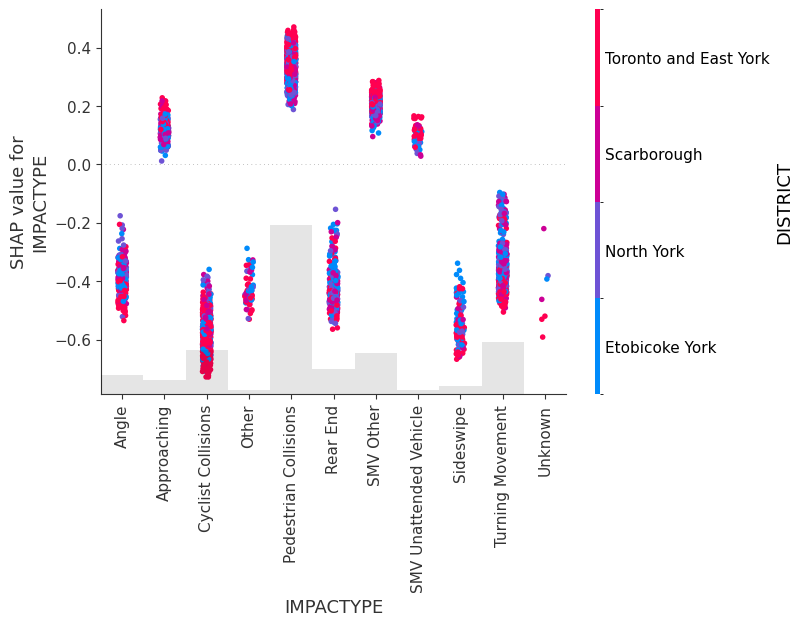

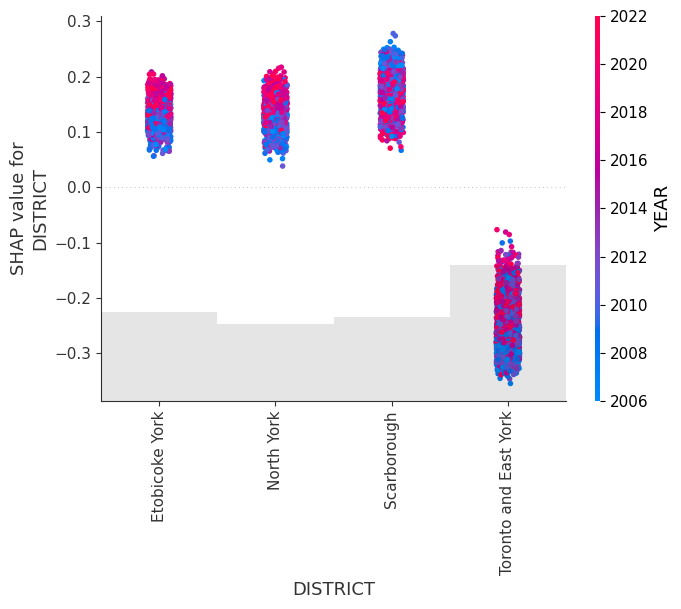

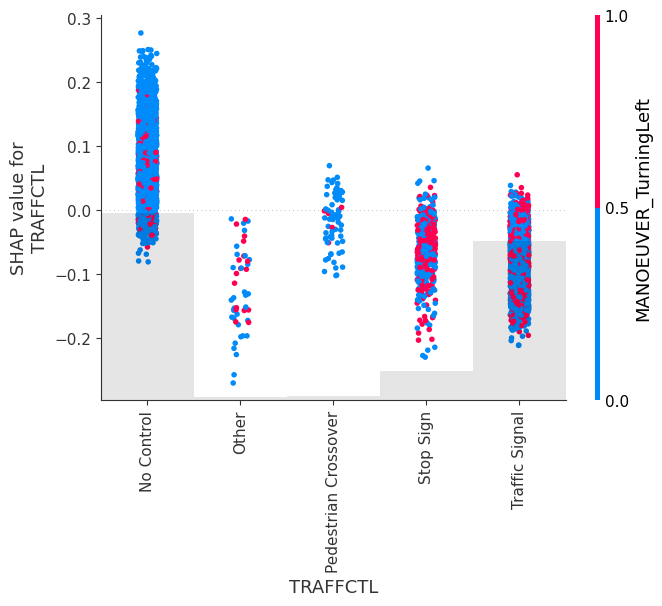

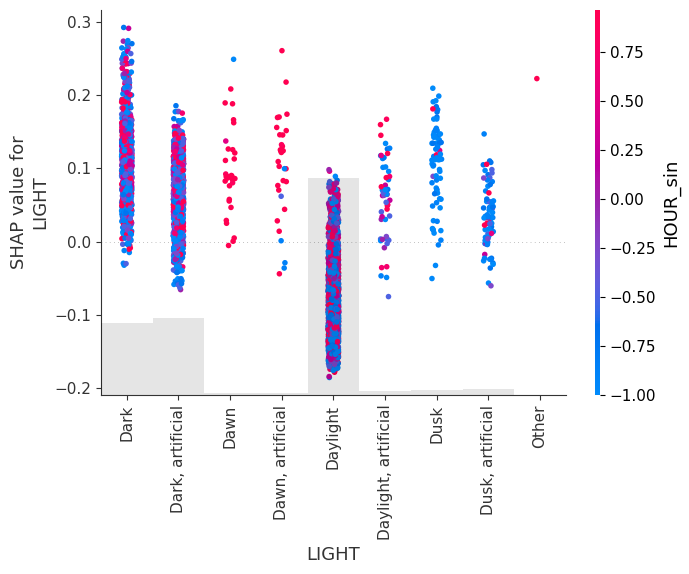

In [7]:
shap.plots.scatter(shap_values[:,'IMPACTYPE'], shap_values[:, 'DISTRICT'])
shap.plots.scatter(shap_values[:,'DISTRICT'], shap_values[:, 'YEAR'])
shap.plots.scatter(shap_values[:,'TRAFFCTL'], shap_values[:, 'MANOEUVER_TurningLeft'])
shap.plots.scatter(shap_values[:,'LIGHT'], shap_values[:, 'HOUR_sin'])